goal: take manual_myelin_dataset and create train_data, and test_data

In [61]:
import pandas as pd
import numpy as np
import pickle
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split




In [2]:
#load dataset
manual_myelin_dataset = pd.read_pickle("manual_myelin_dataset_2.pkl")

In [56]:
#copy dataset.

#make a copy of the dataset, but with only the "image_unwr" column and the "tag" column
dataset = manual_myelin_dataset[["image_unwr", "myelin"]].copy()
#change tags that are "f" to 0 and "t" to 1
dataset["myelin"] = dataset["myelin"].map({"f": 0, "t": 1})
#change "tag" column name to "label"
dataset.rename(columns={"myelin": "label"}, inplace=True)
dataset.rename(columns={"image_unwr": "image"}, inplace=True)


#need to take the image_unwr class, and make them all the same size, using skimage.transform.resize, images to 40 by 100
dataset["image"] = dataset["image"].apply(lambda x: resize(x, (40, 100), anti_aliasing=True))
dataset["image"] = dataset["image"].apply(lambda img: np.expand_dims(img,axis = 0)) # Add a channel dimension


In [64]:
#split into test/train, and save.

train_df, test_df = train_test_split(
    dataset,
    test_size=0.2,
    stratify=dataset["label"],  # Preserves label distribution
    random_state=42
)

#pickle
train_df.to_pickle("train_data.pkl")
test_df.to_pickle("test_data.pkl")

In [68]:
#get number of samples in each dataset, including number samples that are label 1 or 0, as well as proportion of 1's and 0's in whole dataset
print("Train dataset size:", len(train_df))
print("Test dataset size:", len(test_df))
print("Train dataset label 0 count:", train_df["label"].value_counts().get(0, 0))
print("Train dataset label 1 count:", train_df["label"].value_counts().get(1, 0))
print("Test dataset label 0 count:", test_df["label"].value_counts().get(0, 0))
print("Test dataset label 1 count:", test_df["label"].value_counts().get(1, 0))
print("Train dataset label 0 proportion:", dataset["label"].value_counts(normalize=True).get(0, 0)) 

Train dataset size: 10903
Test dataset size: 2726
Train dataset label 0 count: 8655
Train dataset label 1 count: 2248
Test dataset label 0 count: 2164
Test dataset label 1 count: 562
Train dataset label 0 proportion: 0.7938219972118277


Text(0.5, 1.0, 'Label: 1')

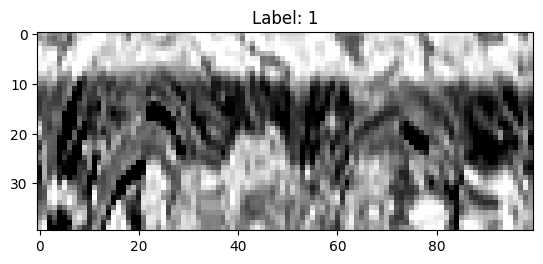

In [58]:
#visualize
row = 2000
plt.imshow(dataset["image"][row].squeeze(), cmap='gray',vmin=110, vmax=145)
plt.title(f"Label: {dataset['label'][row]}")

# #print average image size in second dimension in dataset
# avg_size = dataset["image"].apply(lambda x: x.shape[1]).mean()
# print(f"Average image size in second dimension: {avg_size}")

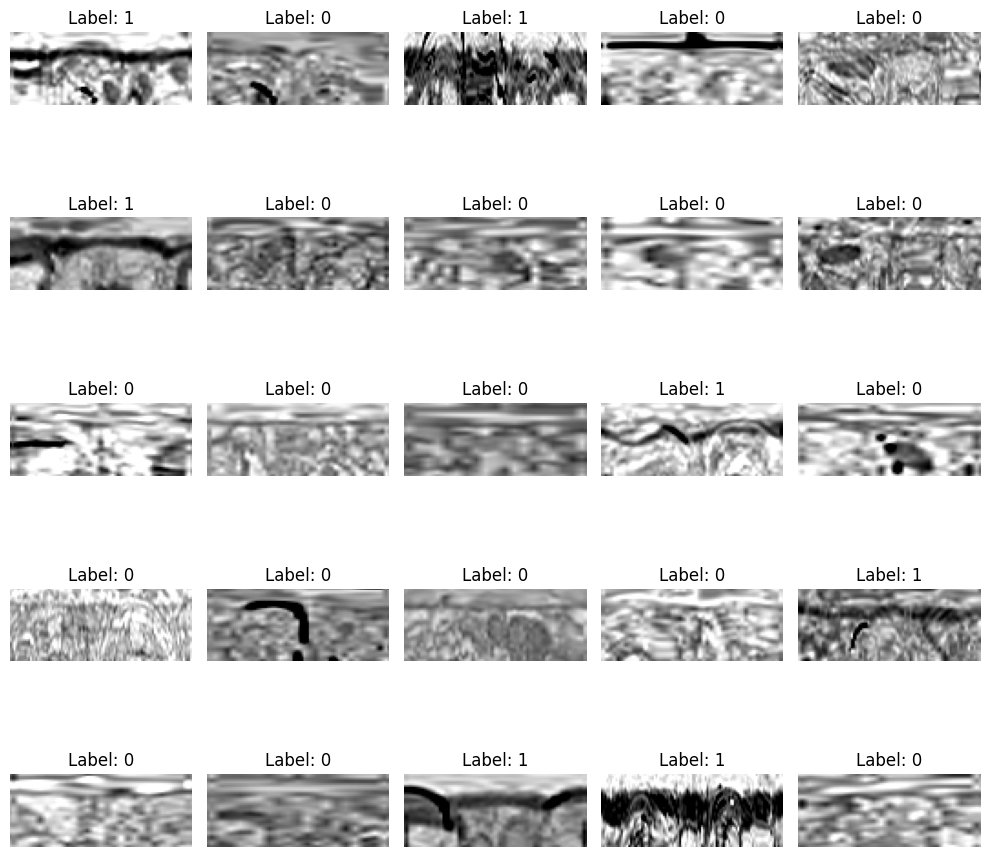

In [59]:
#visualize harder

seed = 2  # Change this value to use a different random seed

# Visualization toggles
n_rows = 5    # Number of rows in the grid
n_cols = 5   # Number of columns in the grid

np.random.seed(seed)
total_samples = n_rows * n_cols
random_indices = np.random.choice(dataset.index, size=total_samples, replace=False)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))
for ax, idx in zip(axes.flat, random_indices):
    ax.imshow(dataset["image"][idx].squeeze(), cmap='gray', vmin=110, vmax=145)
    ax.set_title(f"Label: {dataset['label'][idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()